 ## INSTALAÇÃO DE PACOTES E BIBLIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemme
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import unicodedata

In [ ]:
# Download NLTK stopwords if needed (assuming Portuguese)
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install -U spacy
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

LEITURA EXCEL

In [ ]:
import pandas as pd

# Substitua 'seu_arquivo.csv' pelo caminho para o seu arquivo CSV
caminho_arquivo = '/content/dataset.csv'

# Tente ler o arquivo CSV especificando a codificação correta
try:
    df = pd.read_csv(caminho_arquivo, encoding='latin1')

    # Corrigir as palavras erradas apenas nas colunas de texto
    for coluna in df.columns:
        if df[coluna].dtype == 'object':  # Verifica se a coluna contém texto
            df[coluna] = df[coluna].astype(str).apply(lambda x: x.encode('latin1').decode('utf-8', 'ignore'))

    # Exibir as primeiras linhas do DataFrame corrigido
    print(df.head())

except Exception as e:
    print("Ocorreu um erro ao tentar ler o arquivo CSV:", e)

                                               title  \
0  Haverá pressão por transparência no 'brexit', ...   
1  Empresário confirma ter pago propina para obte...   
2  Falta de ataques do São Paulo surpreende corin...   
3  Líderes de comissão do Senado não veem sinais ...   
4  Renan opera contra governo e reforma trabalhis...   

                                                text        date category  \
0  As negociações do "brexit" devem ocorrer a por...  2017-03-31    mundo   
1  O empresário Augusto Ribeiro de Mendonça Neto,...  2015-03-02    poder   
2  Cássio sorriu e pareceu sem jeito com a pergun...  2015-02-19  esporte   
3  Os líderes dos partidos Republicano e Democrat...  2017-03-16    mundo   
4  Um acordo que contou com a articulação de Rena...  2017-03-05  mercado   

  subcategory  
0         nan  
1         nan  
2         nan  
3         nan  
4         nan  


# ANÁLISE EXPLORATÓRIA


Visualização das primeiras linhas do DataFrame:
                                               title  \
0  Haverá pressão por transparência no 'brexit', ...   
1  Empresário confirma ter pago propina para obte...   
2  Falta de ataques do São Paulo surpreende corin...   
3  Líderes de comissão do Senado não veem sinais ...   
4  Renan opera contra governo e reforma trabalhis...   

                                                text        date category  \
0  As negociações do "brexit" devem ocorrer a por...  2017-03-31    mundo   
1  O empresário Augusto Ribeiro de Mendonça Neto,...  2015-03-02    poder   
2  Cássio sorriu e pareceu sem jeito com a pergun...  2015-02-19  esporte   
3  Os líderes dos partidos Republicano e Democrat...  2017-03-16    mundo   
4  Um acordo que contou com a articulação de Rena...  2017-03-05  mercado   

  subcategory  
0         nan  
1         nan  
2         nan  
3         nan  
4         nan  

Resumo estatístico das colunas numéricas:
             

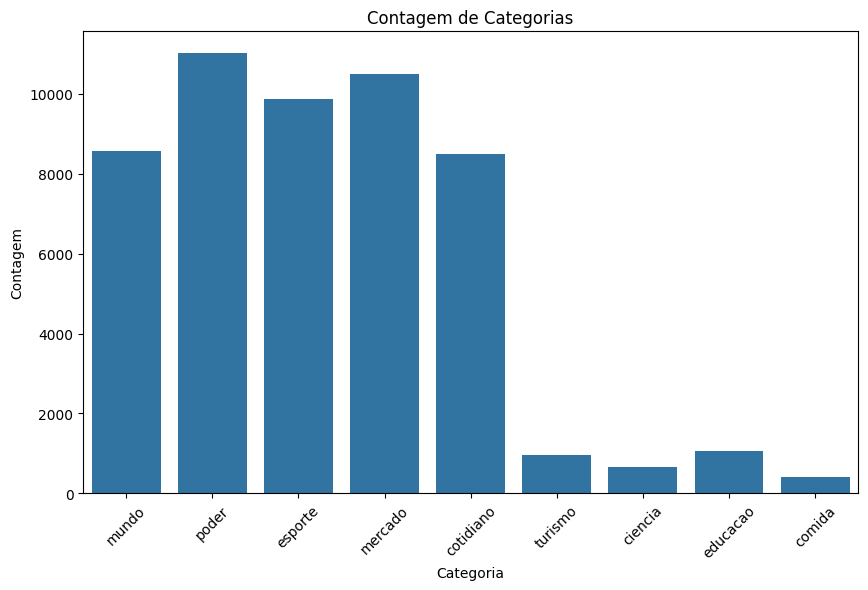

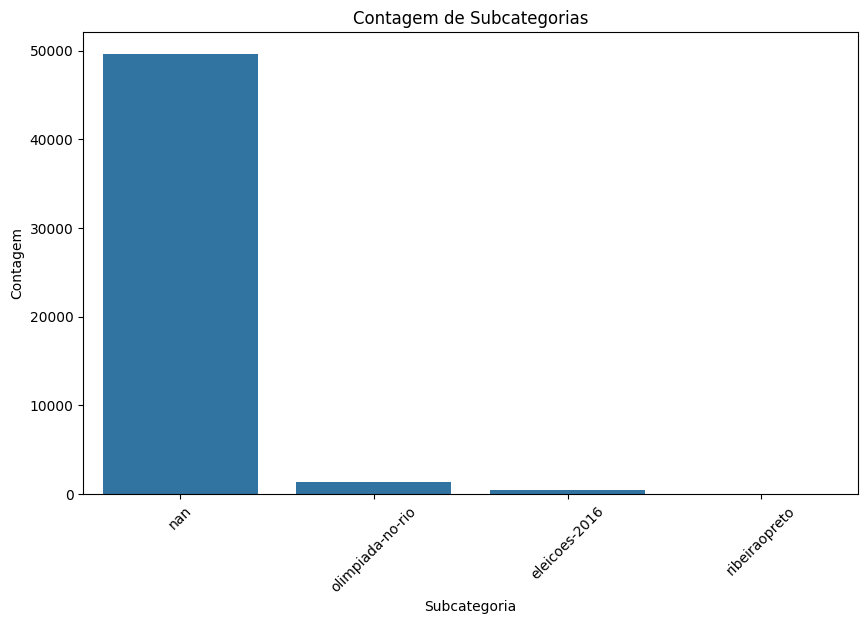

In [ ]:
# Visualizar as primeiras linhas do DataFrame
print("Visualização das primeiras linhas do DataFrame:")
print(df.head())

# Resumo estatístico das colunas numéricas
print("\nResumo estatístico das colunas numéricas:")
print(df.describe())

# Verificar tipos de dados e informações do DataFrame
print("\nInformações do DataFrame:")
print(df.info())

# Verificar se há valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Plotar a contagem de categorias
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Contagem de Categorias')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Plotar a contagem de subcategorias
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='subcategory')
plt.title('Contagem de Subcategorias')
plt.xlabel('Subcategoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


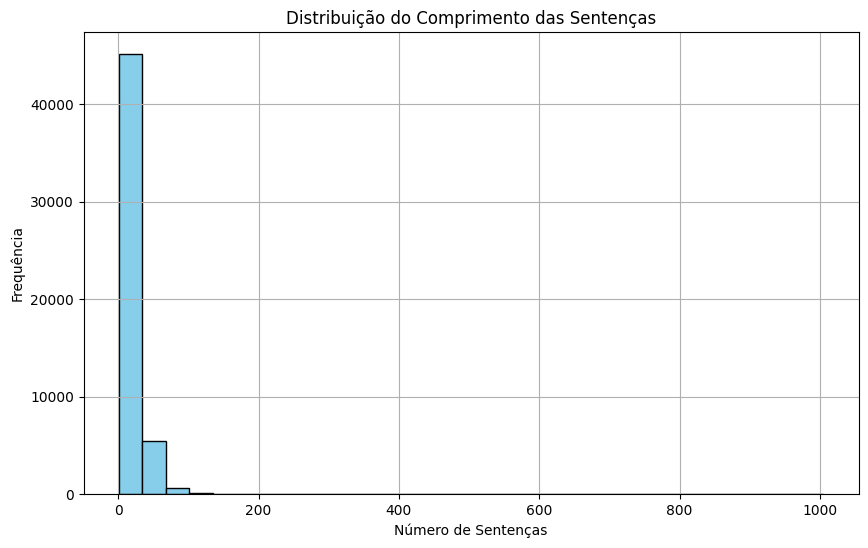

In [ ]:
# Distribuição do comprimento das sentenças
df['num_sentencas'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
plt.figure(figsize=(10, 6))
plt.hist(df['num_sentencas'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Comprimento das Sentenças')
plt.xlabel('Número de Sentenças')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
category_counts = df['category'].value_counts()
print(category_counts)

category
poder        11011
mercado      10485
esporte       9865
mundo         8565
cotidiano     8484
educacao      1059
turismo        952
ciencia        667
comida         414
Name: count, dtype: int64


## PRÉ PROCESSAMENTO DOS DADOS

In [ ]:
# Load spaCy Portuguese model (change 'pt_core_news_sm' for different models)
nlp = spacy.load("pt_core_news_sm")

# Function to combine pre-processing steps
def preprocess_text(text):
  """
  Pre-processes text data using NLTK and spaCy.

  Args:
      text (str): The text to be pre-processed.

  Returns:
      str: The pre-processed text.
  """

  # NLTK Pre-processing
  text = text.lower()  # Convert to lowercase
  text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation (using imported string module)
  tokens = text.split()  # Tokenize into words
  tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords (using downloaded stopwords)
  stemmer = SnowballStemmer('portuguese')  # Optional: Stemming (uncomment if needed)
  # tokens = [stemmer.stem(token) for token in tokens]  # Uncomment to apply stemming

  # spaCy Pre-processing (optional)
  doc = nlp(text)  # Create spaCy Doc object
  tokens = [token.text for token in doc if token.is_alpha]  # Extract alphanumeric tokens

  # Combine pre-processed tokens (consider customization for your task)
  preprocessed_text = ' '.join(tokens)
  return preprocessed_text

# Apply pre-processing to your DataFrame column
df['texto_preprocessado'] = df['text'].apply(preprocess_text)

# Print or save the pre-processed DataFrame
print(df[['text', 'texto_preprocessado']].head())  # Example: View pre-processing results
df.to_csv('preprocessed_data.csv', index=False)  # Example: Save pre-processed data

                                                text  \
0  As negociações do "brexit" devem ocorrer a por...   
1  O empresário Augusto Ribeiro de Mendonça Neto,...   
2  Cássio sorriu e pareceu sem jeito com a pergun...   
3  Os líderes dos partidos Republicano e Democrat...   
4  Um acordo que contou com a articulação de Rena...   

                                 texto_preprocessado  
0  as negociações do brexit devem ocorrer a porta...  
1  o empresário augusto ribeiro de mendonça neto ...  
2  cássio sorriu e pareceu sem jeito com a pergun...  
3  os líderes dos partidos republicano e democrat...  
4  um acordo que contou com a articulação de rena...  


In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation (using imported string module)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize into words
    tokens = text.split()

    # Remove stopwords (using downloaded stopwords)
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]

    # Optional: Stemming (uncomment if needed)
    stemmer = SnowballStemmer('portuguese')
    # tokens = [stemmer.stem(token) for token in tokens]  # Uncomment to apply stemming

    # Combine pre-processed tokens (consider customization for your task)
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply pre-processing to your DataFrame column
df['texto_preprocessado'] = df['text'].apply(preprocess_text)

# Print or save the pre-processed DataFrame
print(df[['text', 'texto_preprocessado']].head())  # Example: View pre-processing results
df.to_csv('preprocessed_data.csv', index=False)  # Example: Save pre-processed data

                                                text  \
0  As negociações do "brexit" devem ocorrer a por...   
1  O empresário Augusto Ribeiro de Mendonça Neto,...   
2  Cássio sorriu e pareceu sem jeito com a pergun...   
3  Os líderes dos partidos Republicano e Democrat...   
4  Um acordo que contou com a articulação de Rena...   

                                 texto_preprocessado  
0  negociações brexit devem ocorrer portas fechad...  
1  empresário augusto ribeiro mendonça neto sócio...  
2  cássio sorriu pareceu jeito pergunta tentou di...  
3  líderes partidos republicano democrata comissã...  
4  acordo contou articulação renan calheiros pmdb...  


In [ ]:
df = pd.read_csv('/content/preprocessed_data.csv')

def preprocess_text(text):
    """
    Função para pré-processar texto em português para classificação de notícias.

    Argumentos:
        text (str): O texto a ser pré-processado.

    Retorna:
        str: O texto pré-processado.
    """

    # Converter para minúsculas
    text = text.lower()

    # Remover pontuação (usando módulo string importado)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizar em palavras
    tokens = text.split()

    # Remover stopwords (usando stopwords baixados)
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]

    # Normalização de acentos (opcional)
    normalized_tokens = []
    for token in tokens:
        normalized_token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
        normalized_tokens.append(normalized_token)

    # Lemmatization (opcional)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token in normalized_tokens:
        lemmatized_token = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemmatized_token)

    # Optional: Stemming (descomente se necessário)
    stemmer = SnowballStemmer('portuguese')
    # tokens = [stemmer.stem(token) for token in tokens]  # Descomente para aplicar stemming

    # Combinar tokens pré-processados (considere personalização para sua tarefa)
    preprocessed_text = ' '.join(lemmatized_tokens)  # Use tokens lematizados para o texto final

    return preprocessed_text

# Aplicar pré-processamento à coluna do seu DataFrame
df['texto_preprocessado'] = df['text'].apply(preprocess_text)

# Imprimir ou salvar o DataFrame pré-processado
print(df[['text', 'texto_preprocessado']].head())  # Exemplo: Visualizar resultados do pré-processamento
df.to_csv('dados_pre_processados.csv', index=False)  # Exemplo: Salvar dados pré-processados
df.to_csv('preprocessed2_data.csv', index=False)  # Example: Save pre-processed data

                                                text  \
0  As negociações do "brexit" devem ocorrer a por...   
1  O empresário Augusto Ribeiro de Mendonça Neto,...   
2  Cássio sorriu e pareceu sem jeito com a pergun...   
3  Os líderes dos partidos Republicano e Democrat...   
4  Um acordo que contou com a articulação de Rena...   

                                 texto_preprocessado  
0  negociacoes brexit devem ocorrer porta fechada...  
1  empresario augusto ribeiro mendonca neto socio...  
2  cassio sorriu pareceu jeito pergunta tentou di...  
3  lideres partidos republicano democrata comissa...  
4  acordo contou articulacao renan calheiros pmdb...  


## ANÁLISE EXPLORATÓRIA - DEPOIS DO TEXTO PROCESSADO e TESTES NO MODELO

In [ ]:
import pandas as pd
df = pd.read_csv('/content/preprocessed2_data.csv')

In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Função para pré-processamento de texto
def preprocess_text(text):
    # Tokenização
    tokens = word_tokenize(text.lower())

    # Remoção de stopwords e pontuações
    stop_words = set(stopwords.words('portuguese') + list(string.punctuation))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return filtered_tokens

# Ler o arquivo CSV para um DataFrame
df = pd.read_csv("/content/preprocessed2_data.csv")

# Pré-processar os textos
df['text'] = df['text'].apply(preprocess_text)

# Calcular a frequência de palavras no geral
all_words = [word for text in df['text'] for word in text]
word_freq_all = Counter(all_words)

print("Frequência de palavras no geral:")
print(word_freq_all.most_common(10))  # Exibir as 10 palavras mais frequentes no geral

# Calcular a frequência de palavras por categoria
word_freq_by_category = {}
for category in df['category'].unique():
    category_words = [word for idx, row in df[df['category'] == category].iterrows() for word in row['text']]
    word_freq_by_category[category] = Counter(category_words)

# Exibir a frequência de palavras por categoria
for category, word_freq in word_freq_by_category.items():
    print(f"\nFrequência de palavras na categoria '{category}':")
    print(word_freq.most_common(10))  # Exibir as 10 palavras mais frequentes na categoria

Frequência de palavras no geral:
[('disse', 58615), ('segundo', 49257), ('governo', 48577), ('r', 47712), ('presidente', 45607), ('sobre', 42642), ('ano', 41662), ('ainda', 39822), ('anos', 39023), ('nesta', 36202)]

Frequência de palavras na categoria 'mundo':
[('disse', 14507), ('país', 11124), ('governo', 10897), ('presidente', 10289), ('sobre', 9367), ('trump', 8502), ('pessoas', 8465), ('anos', 8173), ('segundo', 7983), ('contra', 7005)]

Frequência de palavras na categoria 'poder':
[('presidente', 21370), ('governo', 16946), ('disse', 16749), ('federal', 13428), ('dilma', 13126), ('sobre', 12105), ('segundo', 12033), ('afirmou', 10946), ('r', 10175), ('temer', 9629)]

Frequência de palavras na categoria 'esporte':
[('time', 8560), ('disse', 7944), ('jogos', 7659), ('brasil', 7585), ('paulo', 7098), ('contra', 6899), ('jogo', 6806), ('equipe', 6761), ('brasileiro', 6490), ('nesta', 6452)]

Frequência de palavras na categoria 'mercado':
[('r', 20933), ('ano', 16718), ('governo', 14

In [ ]:
# Definir as palavras a serem removidas
palavras_a_remover = {
    'mundo': ['sobre', 'anos'],
    'poder': ['sobre', 'afirmou', 'ainda'],
    'esporte': ['ainda'],
    'mercado': ['sobre', 'empresa'],
    'cotidiano': ['ainda'],
    'turismo': ['onde'],
    'ciencia': ['ainda', 'sobre', 'pode', 'ter'],
    'educacao': ['diz', 'segundo'],
    'comida': ['diz', 'onde']
    # Adicione outras categorias e palavras a serem removidas conforme necessário
}

# Carregar os dados pré-processados
df = pd.read_csv('/content/preprocessed2_data.csv')

# Função para remover palavras específicas de uma categoria
def remove_palavras_categoria(row):
    categoria = row['category']
    texto = row['text']

    # Verificar se a categoria tem palavras a remover definidas
    if categoria in palavras_a_remover:
        for palavra in palavras_a_remover[categoria]:
            texto = texto.replace(palavra, '')

    return texto

# Aplicar a remoção de palavras por categoria
df['text'] = df.apply(remove_palavras_categoria, axis=1)

# Salvar os dados modificados
df.to_csv('/content/preprocessed2_data_removido.csv', index=False)

In [ ]:
# Carregar o DataFrame
df = pd.read_csv('/content/preprocessed2_data_removido.csv')



# Função para calcular a frequência de palavras por categoria
def word_frequency_by_category(dataframe, category_column, text_column):
    categories = dataframe[category_column].unique()
    word_freq_by_category = {}

    for category in categories:
        category_data = dataframe[dataframe[category_column] == category]
        all_words = []
        for text in category_data[text_column]:
            preprocessed_text = preprocess_text(text)
            all_words.extend(preprocessed_text)
        word_freq_by_category[category] = Counter(all_words)

    return word_freq_by_category

# Calcular a frequência de palavras por categoria
word_freq_by_category = word_frequency_by_category(df, 'category', 'text')

# Exibir as 10 palavras mais frequentes em cada categoria
for category, word_freq in word_freq_by_category.items():
    print(f"Frequência de palavras na categoria '{category}':")
    print(word_freq.most_common(10))
    print()

Frequência de palavras na categoria 'mundo':
[('diss', 16778), ('país', 15752), ('govern', 13222), ('president', 11823), ('estad', 11005), ('pod', 10766), ('part', 9913), ('segund', 9913), ('pesso', 9515), ('nest', 9314)]

Frequência de palavras na categoria 'poder':
[('president', 24947), ('govern', 22022), ('diss', 18680), ('part', 15237), ('segund', 14573), ('cas', 13593), ('pod', 13520), ('federal', 13435), ('dilm', 13134), ('ministr', 12206)]

Frequência de palavras na categoria 'esporte':
[('jog', 19536), ('brasileir', 11547), ('ano', 10801), ('nest', 10722), ('part', 10596), ('tim', 9833), ('primeir', 9406), ('diss', 9196), ('club', 8580), ('segund', 8463)]

Frequência de palavras na categoria 'mercado':
[('ano', 25591), ('govern', 15776), ('pod', 13907), ('nest', 12947), ('segund', 12825), ('diss', 12402), ('merc', 11990), ('país', 11537), ('bilhõ', 11296), ('banc', 11289)]

Frequência de palavras na categoria 'cotidiano':
[('ano', 14680), ('cas', 13073), ('segund', 12194), ('p

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pickle

# Definindo colunas de texto e rótulos
text_column = 'text'
label_column = 'category'

# Separando dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
  df[text_column], df[label_column], test_size=0.2, random_state=42
)

# Codificando rótulos categóricos
label_encoder = LabelEncoder()
y_treino = label_encoder.fit_transform(y_treino)
y_teste = label_encoder.transform(y_teste)

# Definindo o modelo de Regressão Logística
modelo = LogisticRegression()

# Grades de hiperparâmetros
grades_parametros = {
  'C': [0.01, 0.1, 1],
  'max_iter': [1000, 2000, 5000],
}

# Criando pipelines para diferentes representações de texto
pipelines = []

# 1. TfidfVectorizer com normalização L2
pipeline_tfidf_l2 = Pipeline([
  ('tfidf', TfidfVectorizer(max_features=10000, norm="l2")),
  ('clf', GridSearchCV(modelo, grades_parametros, cv=5, scoring='accuracy')),
])
pipelines.append(('TfidfVectorizer L2', pipeline_tfidf_l2))

# Treinando e avaliando modelos
for nome_modelo, pipeline in pipelines:
  print(f"** Treinando e avaliando {nome_modelo} com GridSearchCV...")

# Treinando o pipeline
  pipeline.fit(X_treino, y_treino)

# Salvando o modelo treinado e o vectorizer
  with open(f'{nome_modelo}_model.pkl', 'wb') as model_file:
   pickle.dump(pipeline, model_file)

  with open(f'{nome_modelo}_vectorizer.pkl', 'wb') as vectorizer_file:
   pickle.dump(pipeline.named_steps['tfidf'], vectorizer_file)  # Use 'tfidf' here

# Previsão e avaliação no conjunto de teste
  y_pred = pipeline.predict(X_teste)
  print(f"Classification Report para {nome_modelo}:")
  print(classification_report(y_teste, y_pred, target_names=label_encoder.classes_))

# Salvando o codificador de rótulos
with open('label_encoder.pkl', 'wb') as encoder_file:
  pickle.dump(label_encoder, encoder_file)

** Treinando e avaliando TfidfVectorizer L2 com GridSearchCV...
Classification Report para TfidfVectorizer L2:
              precision    recall  f1-score   support

     ciencia       0.94      0.73      0.82       127
      comida       0.92      0.65      0.76        92
   cotidiano       0.90      0.95      0.92      1638
    educacao       0.86      0.86      0.86       236
     esporte       0.99      0.98      0.98      1968
     mercado       0.93      0.93      0.93      2101
       mundo       0.94      0.97      0.95      1728
       poder       0.94      0.93      0.93      2222
     turismo       0.93      0.75      0.83       189

    accuracy                           0.94     10301
   macro avg       0.93      0.86      0.89     10301
weighted avg       0.94      0.94      0.94     10301



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializando o vetorizador TF-IDF
vetorizador = TfidfVectorizer()

# Vetorizando os dados de treino e teste
X_treino_vetorizado = vetorizador.fit_transform(X_treino)
X_teste_vetorizado = vetorizador.transform(X_teste)

# Inicializando o classificador de regressão logística com o parâmetro class_weight
# 'balanced' atribui pesos inversamente proporcionais às frequências das classes
modelo = LogisticRegression(class_weight='balanced')

# Treinando o modelo
modelo.fit(X_treino_vetorizado, y_treino)

# Avaliando o modelo
acuracia = modelo.score(X_teste_vetorizado, y_teste)
print("Acurácia do modelo:", acuracia)

Acurácia do modelo: 0.9331132899718474


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pickle

# Definindo colunas de texto e rótulos
text_column = 'text'
label_column = 'category'

# Separando dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
  df[text_column], df[label_column], test_size=0.2, random_state=42
)

# Codificando rótulos categóricos
label_encoder = LabelEncoder()
y_treino = label_encoder.fit_transform(y_treino)
y_teste = label_encoder.transform(y_teste)

# Definindo o modelo de Regressão Logística com balanceamento de classes
modelo = LogisticRegression(class_weight='balanced')

# Grades de hiperparâmetros
grades_parametros = {
  'C': [0.01, 0.1, 1],
  'max_iter': [1000, 2000, 5000],
}

# Criando pipelines para diferentes representações de texto
pipelines = []

# 1. TfidfVectorizer com normalização L2
pipeline_tfidf_l2 = Pipeline([
  ('tfidf', TfidfVectorizer(max_features=10000, norm="l2")),
  ('clf', GridSearchCV(modelo, grades_parametros, cv=5, scoring='accuracy')),
])
pipelines.append(('TfidfVectorizer L2', pipeline_tfidf_l2))

# Treinando e avaliando modelos
for nome_modelo, pipeline in pipelines:
  print(f"** Treinando e avaliando {nome_modelo} com GridSearchCV...")

# Treinando o pipeline
  pipeline.fit(X_treino, y_treino)

# Salvando o modelo treinado e o vectorizer
  with open(f'{nome_modelo}_model.pkl', 'wb') as model_file:
   pickle.dump(pipeline, model_file)

  with open(f'{nome_modelo}_vectorizer.pkl', 'wb') as vectorizer_file:
   pickle.dump(pipeline.named_steps['tfidf'], vectorizer_file)  # Use 'tfidf' here

# Previsão e avaliação no conjunto de teste
  y_pred = pipeline.predict(X_teste)
  print(f"Classification Report para {nome_modelo}:")
  print(classification_report(y_teste, y_pred, target_names=label_encoder.classes_))

# Salvando o codificador de rótulos
with open('label_encoder.pkl', 'wb') as encoder_file:
  pickle.dump(label_encoder, encoder_file)

** Treinando e avaliando TfidfVectorizer L2 com GridSearchCV...
Classification Report para TfidfVectorizer L2:
              precision    recall  f1-score   support

     ciencia       0.76      0.94      0.84       127
      comida       0.81      0.89      0.85        92
   cotidiano       0.91      0.93      0.92      1638
    educacao       0.81      0.94      0.87       236
     esporte       0.99      0.97      0.98      1968
     mercado       0.94      0.91      0.93      2101
       mundo       0.95      0.95      0.95      1728
       poder       0.94      0.92      0.93      2222
     turismo       0.74      0.90      0.81       189

    accuracy                           0.93     10301
   macro avg       0.87      0.93      0.90     10301
weighted avg       0.94      0.93      0.93     10301

